In [1]:
# import necessary libraries
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt



def dSigmoid(x):
    return np.exp(x)/ (1.0 + np.exp(x))**2

def sigmoid(x):
    return 1.0/ (1.0 + np.exp(-x))

#### Forward Computation (Vectorized Equations) :



$$ Z^l = (W^l)^T . a^{l-1} + b^l$$
Here $ a^0 = X^T ; a^l = \sigma '(Z^l) $


Loss for $ X_n$ $$ Loss_n = \frac{1}{2} \sum_{k=1}^C (y_k - a_k^L)^2$$  

#### Backprogation (Vectorized Equations) :
$$\delta^ l = W^{l+1} . \delta^{l+1} \oplus \sigma'(Z^{l}) $$ where $ \delta^ l = \frac{\delta Loss}{\delta Z^{l}}$ and $\oplus $ denotes elementwise multiplication 


$$ \delta^L = (a^{L} - y^{L}) \oplus \sigma'(Z^{L})$$ where $L$ is the last layer


$$ \frac{ \delta Loss}{\delta b^l} = \delta^l$$


$$ \frac{\delta Loss}{\delta W^l} = a^{l-1} . (\delta ^l)^T $$



In [2]:
class Neural_Network:
    def __init__(self, n_in, n_hidden, n_out):
        # Network dimensions
        self.n_x = n_in #d
        self.n_h = n_hidden #h
        self.n_y = n_out #c
        
        # Parameters initialization
        self.W1 = np.random.randn( self.n_x, self.n_h) * 0.01
        self.b1 = np.zeros((self.n_h, 1))
        self.W2 = np.random.randn( self.n_h, self.n_y) * 0.01
        self.b2 = np.zeros((self.n_y, 1))

    def forward(self, X):
        """ Forward computation """
        self.Z1 = np.dot(self.W1.T,X) + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.W2.T,self.A1) + self.b2
        self.A2 = sigmoid(self.Z2)
    
    def back_prop(self,  X, Y):
        """ Back-progagate gradient of the loss """
        m = X.shape[1]
        self.dZ2 = np.multiply((self.A2 - Y),dSigmoid(self.Z2)) # h(2)X m
        self.dW2 = (1 / m) * np.dot(self.A1,self.dZ2.T)
        self.db2 = (1 / m) * np.sum(self.dZ2, axis=1, keepdims=True)
        self.dZ1 = np.multiply(np.dot(self.W2, self.dZ2),dSigmoid(self.Z1))
        self.dW1 = (1 / m) * np.dot(X,self.dZ1.T)
        self.db1 = (1 / m) * np.sum(self.dZ1, axis=1, keepdims=True)

    def train(self, X, Y, epochs, learning_rate=1.2):
        """ Complete process of learning, alternates forward pass,
            backward pass and parameters update """
        self.losses = []
        m = X.shape[0]
        for e in range(epochs):
            self.forward(X.T)
            loss =np.sum((Y.T-self.A2)**2) / m
            self.back_prop(X.T, Y.T)
            self.losses.append(loss)

            self.W1 -= learning_rate * self.dW1
            self.b1 -= learning_rate * self.db1
            self.W2 -= learning_rate * self.dW2
            self.b2 -= learning_rate * self.db2

            if e % 1000 == 0:
                print("Loss ",  e+1, " = ", loss)

    def predict(self, X):
        """ Compute predictions with just a forward pass """
        self.forward(X.T)
        return np.round(self.A2.T).astype(np.int)


##### Create data Set

(1000, 2)
(1000, 1)


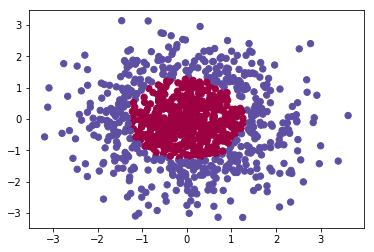

In [3]:
N = 1000
def load_data():
    
    gq = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=1.2,
                                                  n_samples=N, n_features=2,
                                                  n_classes=2, shuffle=True,
                                                  random_state=None)
    return gq


def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

    
gaussian_quantiles = load_data()
X, Y = gaussian_quantiles


# Input Data
plt.figure("Input Data")
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)

Y = Y.reshape(N,1)
print(X.shape)
print(Y.shape)


##### Initialize the neural Network and train on the inputs :

In [4]:
nn = Neural_Network(2, 10, 1)
nn.train(X, Y, 100000, 1.0)

Loss  1  =  0.2500029326843883
Loss  1001  =  0.24982403933766847
Loss  2001  =  0.24878379104036777
Loss  3001  =  0.2431714325505845
Loss  4001  =  0.18189215036557901
Loss  5001  =  0.14047645031523093
Loss  6001  =  0.06627804343703785
Loss  7001  =  0.047562339108348735
Loss  8001  =  0.04169216234485797
Loss  9001  =  0.03827254027060519
Loss  10001  =  0.035740622410486554
Loss  11001  =  0.03366487672645789
Loss  12001  =  0.03177392558294805
Loss  13001  =  0.029799206025506435
Loss  14001  =  0.027840096222289907
Loss  15001  =  0.026198638937310895
Loss  16001  =  0.024852688928632998
Loss  17001  =  0.023700523781440275
Loss  18001  =  0.022666604693534202
Loss  19001  =  0.021701676439470567
Loss  20001  =  0.02078394876619148
Loss  21001  =  0.01991215909096124
Loss  22001  =  0.019090680707207403
Loss  23001  =  0.018322229996402768
Loss  24001  =  0.017608490204200366
Loss  25001  =  0.01695166826738044
Loss  26001  =  0.01635376740737914
Loss  27001  =  0.0158145349418

##### Plot the results : 

Text(0.5,1,'Loss v/s Epoch')

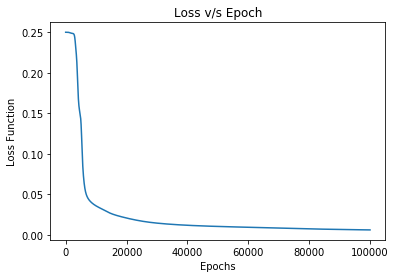

In [5]:
plt.plot(range(len(nn.losses)),nn.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss Function")
plt.title("Loss v/s Epoch")

In [6]:
nn_predictions = nn.predict(X)
print("Neural Network accuracy : ", np.sum(nn_predictions == Y) / Y.shape[0])

Neural Network accuracy :  0.998
